이 코드에서는 저장 공간을 가상 공간으로 둔 것이 아닌,
드라이브 로컬 공간으로 경로를 변경한 것이다.

이 이유는 파일의 이동 경로와 모델 학습 시켰을 때의 결과값 파일을 확인하기 위해서이다.

또한 detect.py 파일을 수정했으며, 원본 또한 보존되어있다.

수정된 detect.py에서는 여러 개의 객체가 검출될 경우, 가장 중앙에 있는 객체 하나만을 선택해, 해당 객체만을 인식하여 bounding box 처리하도록 하였다.

# 모델 학습 전까지

## 드라이브 연결 -> vs코드 필요X

In [2]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('./MyDrive')

ModuleNotFoundError: No module named 'google'

## 기본 패키지 설치 및 설정

In [3]:
# yolov5 클론 내 드라이브 안에 설치
# git clone https://github.com/ultralytics/yolov5.git
# pip install -r yolov5/requirements.txt

# 학습 이미지 로드

In [2]:
# 전체 이미지 로드
import os
from glob import glob

# 이미지와 라벨 파일 리스트 가져오기
all_list = glob(os.path.join('data_ver3_all', 'images', '*.jpg')) + glob(os.path.join('data_ver3_all', 'images', '*.png'))
all_txt = glob(os.path.join('data_ver3_all', 'labels', '*.txt'))

# 이미지와 라벨 파일 수 출력
print(len(all_list))
print(len(all_txt))

# data.yaml 파일 내용 확인
data_yaml_path = os.path.join('data_ver3_all', 'data.yaml')
with open(data_yaml_path, 'r') as file:
    data_yaml_content = file.read()
    print(data_yaml_content)

919
919
names:
- aloe
- bacchus
- cider
- coca
- coco1
- coco2
- coffee
- confid
- demi
- fanta
- maesil
- mango
- olatte
- orange
- peach
- pocari
- sikhye1
- sikhye2
nc: 18
train: data_ver3_all/train.txt
val: data_ver3_all/val.txt



## test, validation set 분리

In [4]:
#pip install scikit-learn

In [5]:
# train set와 validation set으로 나눈다.
from sklearn.model_selection import  train_test_split
train_img_list, val_img_list = train_test_split(all_list, test_size=0.2, random_state=42)

print(len(train_img_list), len(val_img_list))

735 184


## 이미지 정리

In [6]:
#pip install pyyaml

In [6]:
# train img와 val img 이미지 경로를 txt 파일로 저장
with open('data_ver3_all/train.txt', 'w') as f :  # 이미지 경로들이 txt파일에 한 줄씩 저장되어 있음
    f.write('\n'.join(train_img_list)+'\n')
with open('data_ver3_all/val.txt', 'w') as f :
    f.write('\n'.join(val_img_list)+'\n')

import yaml
with open('data_ver3_all/data.yaml', 'r') as f :
    data = yaml.load(f, Loader=yaml.FullLoader)
print(data)

data['train'] = 'data_ver3_all/train.txt'
data['val'] = 'data_ver3_all/val.txt'

with open('data_ver3_all/data.yaml','w') as f :
    yaml.dump(data, f)

print(data)

{'names': ['aloe', 'bacchus', 'cider', 'coca', 'coco1', 'coco2', 'coffee', 'confid', 'demi', 'fanta', 'maesil', 'mango', 'olatte', 'orange', 'peach', 'pocari', 'sikhye1', 'sikhye2'], 'nc': 18, 'train': 'data_ver3_all/train.txt', 'val': 'data_ver3_all/val.txt'}
{'names': ['aloe', 'bacchus', 'cider', 'coca', 'coco1', 'coco2', 'coffee', 'confid', 'demi', 'fanta', 'maesil', 'mango', 'olatte', 'orange', 'peach', 'pocari', 'sikhye1', 'sikhye2'], 'nc': 18, 'train': 'data_ver3_all/train.txt', 'val': 'data_ver3_all/val.txt'}


# 모델 훈련

## 모델 훈련 시작

In [5]:
# 훈련시키기
%cd /content/MyDrive/MyDrive/Colab Notebooks/yolov5
!python train.py --img 560 --batch 16 --epochs 10 --data /content/MyDrive/MyDrive/"Colab Notebooks"/data_ver1_all/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results

/content/MyDrive/MyDrive/Colab Notebooks/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 41.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-10-07 10:50:58.539541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 10:50:58.564040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 10:50:58.571583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting 

In [7]:
#pip install comet-ml numpy torch torchvision torchaudio pyyaml tqdm

In [7]:
import os
import subprocess

# yolov5 디렉토리로 이동
os.chdir('C:/drive-download-20241007T143837Z-001/yolov5')

# YOLOv5 훈련 실행
command = [
    'python', '-u', 'train.py',
    '--img', '480',
    '--batch', '16',
    '--epochs', '100',
    '--data', './data_ver3_all/data.yaml',
    '--cfg', './models/yolov5s.yaml',
    '--weights', 'yolov5s.pt',
    '--name', 'yolov5s_results',
    '--patience', '10'             # 성능 개선이 없는 경우 10 에포크 후 조기 종료
]

# 명령 실행 및 출력 확인
result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8', errors='ignore')

# 출력 결과 확인
print("STDOUT:")
print(result.stdout)
print("STDERR:")
print(result.stderr)

STDOUT:
Error decoding JSON from C:\Users\ysmm0\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ysmm0\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

STDERR:
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=./data_ver3_all/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothin

## 텐서보드로 학습 결과 확인하기
- 이건 안돼도 신경 안써도 됨
- 여기 관련된 파일은 "/content/MyDrive/MyDrive/Colab Notebooks/yolov5/runs/train/yolov5s_results(숫자)/" 폴더에 다 저장돼있음

In [33]:
#pip install tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/MyDrive/MyDrive/Colab Notebooks/yolov5/runs/train/yolov5s_results3/

# 출력 관련 모든 부분
- 검토 완료

## 오디오 관련 pip

In [4]:
'''
pip install gTTS
pip install datasets
pip install utils
'''

'\npip install gTTS\npip install datasets\npip install utils\n'

In [1]:
# 출력 결과물 : 이미지 & 음성파일
from IPython.display import Image, Audio
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

## 객체 검출 결과 확인 / ocr 결과

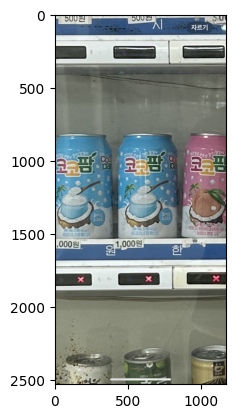

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import time

val_img_path =  "ocr_test2.jpg" # 예측하고 싶은 이미지의 경로 입력
result = img.imread(val_img_path)
plt.imshow(result)
plt.show()

In [34]:
# !python detect.py --weights /content/runs/train/yolov5s_results/weights/best.pt --img 560 --conf 0.5 --source "{val_img_path}"

import os

# 디렉토리 생성
os.makedirs('yolov5/mp3', exist_ok=True) ## mp3 파일 들어가도록 디렉토리 새로 생성함

val_img_path = "ocr_test2.jpg"  # 예측하고 싶은 이미지의 경로 입력
# weights_path = '/content/MyDrive/MyDrive/Colab Notebooks/best.pt'  # 가중치 경로 -> 40 에폭으로 수행했던 것
weights_path = "./yolov5/runs/train/yolov5s_results2/weights/best.pt"

!python ./yolov5/detect.py --weights "{weights_path}" --img 480 --conf 0.5 --source "{val_img_path}"



이 음료수는  코코팜 요구르트  입니다.
가격은  1000원  입니다.


detect: weights=['./yolov5/runs/train/yolov5s_results2/weights/best.pt'], source=ocr_test2.jpg, data=yolov5\data\coco128.yaml, imgsz=[480, 480], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-371-g6629839d Python-3.12.7 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
image 1/1 C:\drive-download-20241007T143837Z-001\ocr_test2.jpg: 480x224 28.6ms
Speed: 1.0ms pre-process, 28.6ms inference, 0.0ms NMS per image at shape (1, 3, 480, 480)
Results saved to yolov5\runs\detect\exp57

## 오디오 변환 출력

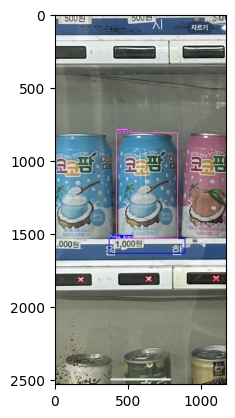

In [8]:
from IPython.display import Image, Audio
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import time

val_img_path = "ocr_test2.jpg" # 예측하고 싶은 이미지의 경로 입력

result = img.imread(os.path.join('./yolov5/runs/detect/exp57',os.path.basename(val_img_path)))
plt.imshow(result)
plt.show()
# time.sleep(5)

# Audio 객체 생성
audio_path = './yolov5/labelEN.mp3'

# 파일이 존재하는지 확인
if os.path.exists(audio_path):
    display(Audio(audio_path, rate=44100, autoplay=True))
else:
    print("Audio file not found at:", audio_path)